# Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [19]:
import pandas as pd
import numpy as np

In [20]:
import io
thefile = io.StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


a) Start with the entire dataset and find the most common MPG value.

In [21]:
# your code here
df['MPG'].value_counts()

bad     15
good     5
Name: MPG, dtype: int64

In [22]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above.

In [23]:
# your code here
result_yes=[]
result_no=[]
for i in range(0,len(df)):
    if df['weight'][i]=='light':
        result_yes.append(df['MPG'][i])
    else:
        result_no.append(df['MPG'][i])
InformationGain(result_yes.count('good'),result_yes.count('bad'),result_no.count('good'),result_no.count('bad'))

0.09710717945150363

In [24]:
result_yes=[]
result_no=[]
for i in range(0,len(df)):
    if df['weight'][i]=='medium':
        result_yes.append(df['MPG'][i])
    else:
        result_no.append(df['MPG'][i])
InformationGain(result_yes.count('good'),result_yes.count('bad'),result_no.count('good'),result_no.count('bad'))

0.0

In [25]:
result_yes=[]
result_no=[]
for i in range(0,len(df)):
    if df['weight'][i]=='weighty':
        result_yes.append(df['MPG'][i])
    else:
        result_no.append(df['MPG'][i])
InformationGain(result_yes.count('good'),result_yes.count('bad'),result_no.count('good'),result_no.count('bad'))

0.15307795338969116

In [26]:
result_yes=[]
result_no=[]
for i in range(0,len(df)):
    if df['cylinders'][i]==4:
        result_yes.append(df['MPG'][i])
    else:
        result_no.append(df['MPG'][i])
InformationGain(result_yes.count('good'),result_yes.count('bad'),result_no.count('good'),result_no.count('bad'))

0.3652938975319328

In [27]:
result_yes=[]
result_no=[]
for i in range(0,len(df)):
    if df['cylinders'][i]==6:
        result_yes.append(df['MPG'][i])
    else:
        result_no.append(df['MPG'][i])
InformationGain(result_yes.count('good'),result_yes.count('bad'),result_no.count('good'),result_no.count('bad'))

0.15307795338969116

In [28]:
result_yes=[]
result_no=[]
for i in range(0,len(df)):
    if df['cylinders'][i]==8:
        result_yes.append(df['MPG'][i])
    else:
        result_no.append(df['MPG'][i])
InformationGain(result_yes.count('good'),result_yes.count('bad'),result_no.count('good'),result_no.count('bad'))

0.1225562489182657

c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. 

In [29]:
df=df.sort_values(by=['HP'])
df=df.reset_index()
df=df.drop(columns='index')

In [30]:
# your code here

for j in range(0,len(df)-1):
    midpoint=np.mean([df['HP'][j],df['HP'][j+1]])
    result_yes=[]
    result_no=[]
    for i in range(0,len(df)):
        if df['HP'][i]>midpoint:
            result_yes.append(df['MPG'][i])
        else:
            result_no.append(df['MPG'][i])
    print(InformationGain(result_yes.count('good'),result_yes.count('bad'),result_no.count('good'),result_no.count('bad')),
          'midpoint=',midpoint)


0.10591493339411553 midpoint= 70.0
0.22625794497561413 midpoint= 78.0
0.36710265610273324 midpoint= 83.0
0.21417094500762923 midpoint= 87.0
0.36577659947122626 midpoint= 89.5
0.2759267455941731 midpoint= 91.0
0.5091859254608121 midpoint= 92.5
0.4295045232891469 midpoint= 93.5
0.3652938975319328 midpoint= 94.5
0.22335687046844122 midpoint= 95.0
0.22335687046844122 midpoint= 95.0
0.22335687046844122 midpoint= 97.5
0.15307795338969116 midpoint= 100.0
0.15307795338969116 midpoint= 105.0
0.1225562489182657 midpoint= 124.5
0.09444753843148686 midpoint= 142.0
0.06839423355087862 midpoint= 157.5
0.044113463674602206 midpoint= 172.5
0.021377455849890127 midpoint= 182.5


d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? 

In [31]:
result_yes=[]
result_no=[]
for i in range(0,len(df)):
    if df['HP'][i]>92.5:
        result_yes.append(df['MPG'][i])
    else:
        result_no.append(df['MPG'][i])
print(result_yes)
print(result_no)

['bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad']
['good', 'good', 'good', 'bad', 'good', 'bad', 'good']


In [ ]:
The best of split at first is to filter the data by check whether the HP is larger or smaller than 92.5.
It can be clear seen that when the HP larger than 92.5, all the results are bad. So we only need to further explore the data than smaller
than 92.5.

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree

In [32]:
# your code here
classified1=df[df['HP']<92.5]
classified1

,MPG,cylinders,HP,weight
0,good,4,65,light
1,good,4,75,light
2,good,4,81,light
3,bad,6,85,medium
4,good,4,89,medium
5,bad,6,90,medium
6,good,4,92,medium


In [33]:
weight=['light','meidum']
cylinder=[4,6]

In [35]:
for j in range(0,len(classified1)-1):
    midpoint=np.mean([classified1['HP'][j],classified1['HP'][j+1]])
    result_yes=[]
    result_no=[]
    for i in range(0,len(classified1)):
        if classified1['HP'][i]>midpoint:
            result_yes.append(classified1['MPG'][i])
        else:
            result_no.append(classified1['MPG'][i])
    print(InformationGain(result_yes.count('good'),result_yes.count('bad'),result_no.count('good'),result_no.count('bad')),
          'midpoint=',midpoint)


0.07600985366278287 midpoint= 70.0
0.16958442967043894 midpoint= 78.0
0.2916919971380595 midpoint= 83.0
0.005977711423773854 midpoint= 87.0
0.06174335793280074 midpoint= 89.5
0.07600985366278287 midpoint= 91.0


In [36]:
for j in range(2):
    result_yes=[]
    result_no=[]
    for i in range(0,len(classified1)):
        if classified1['weight'][i]==weight[j]:
            result_yes.append(classified1['MPG'][i])
        else:
            result_no.append(classified1['MPG'][i])
    print(InformationGain(result_yes.count('good'),result_yes.count('bad'),result_no.count('good'),result_no.count('bad')),
          'weight=',weight[j])


0.2916919971380595 weight= light
0.0 weight= meidum


In [37]:
for j in range(2):
    result_yes=[]
    result_no=[]
    for i in range(0,len(classified1)):
        if classified1['cylinders'][i]==cylinder[j]:
            result_yes.append(classified1['MPG'][i])
        else:
            result_no.append(classified1['MPG'][i])
    print(InformationGain(result_yes.count('good'),result_yes.count('bad'),result_no.count('good'),result_no.count('bad')),
          'cylinder=',cylinder[j])


0.8631205685666309 cylinder= 4
0.8631205685666309 cylinder= 6


In [37]:
result_yes=[]
result_no=[]
for i in range(0,len(classified1)):
    if classified1['cylinders'][i]==4:
        result_yes.append(classified1['MPG'][i])
    else:
        result_no.append(classified1['MPG'][i])
print(result_yes)
print(result_no)

['good', 'good', 'good', 'good', 'good']
['bad', 'bad']


In [33]:
classified2=classified1[classified1['cylinders']==4]
classified2

,index,MPG,cylinders,HP,weight
0,15,good,4,65,light
1,0,good,4,75,light
2,17,good,4,81,light
4,14,good,4,89,medium
6,11,good,4,92,medium


f) Draw or show the final decision tree

Your answer here

                                HP>92.5?
                             NO /       \ Yes
                          Cylinders=6?     BAD    
                           NO /    \Yes    
                           Good     BAD

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).

???,4,95,light

???,6,113,medium

???,4,83,weighty

???,6,70,weighty


In [ ]:
First filter by the hp, if HP larger than 92.5,then the result would be bad. Then check the cylinders of the data when HP smaller than 92.5.
If cylinders equals to 4, then the result would be good. Else it could be bad. So the result is:
BAD,4,95,light

BAD,6,113,medium

GOOD,4,83,weighty

BAD,6,70,weighty

# Predicting burden of disease 

In [5]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

In [6]:
# your code here
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [7]:
X = data.iloc[:,1:-1]
Y=data.iloc[:,-1]
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [8]:
OS_accuracy=[]
AUC=[]
for i in range(5,200,5):
    model=DecisionTreeRegressor(max_leaf_nodes=i)
    model.fit(X_train,Y_train)
    OS_accuracy.append(accuracy_score(Y_test,model.predict(X_test)))
    print('Out of sample accuracy:',accuracy_score(Y_test,model.predict(X_test)))

Out of sample accuracy: 0.5769230769230769
Out of sample accuracy: 0.7692307692307693
Out of sample accuracy: 0.8076923076923077
Out of sample accuracy: 0.8076923076923077
Out of sample accuracy: 0.7692307692307693
Out of sample accuracy: 0.7692307692307693
Out of sample accuracy: 0.7307692307692307
Out of sample accuracy: 0.8461538461538461
Out of sample accuracy: 0.8076923076923077
Out of sample accuracy: 0.8076923076923077
Out of sample accuracy: 0.8461538461538461
Out of sample accuracy: 0.7307692307692307
Out of sample accuracy: 0.7692307692307693
Out of sample accuracy: 0.8076923076923077
Out of sample accuracy: 0.7692307692307693
Out of sample accuracy: 0.8461538461538461
Out of sample accuracy: 0.7692307692307693
Out of sample accuracy: 0.7692307692307693
Out of sample accuracy: 0.7307692307692307
Out of sample accuracy: 0.7692307692307693
Out of sample accuracy: 0.8076923076923077
Out of sample accuracy: 0.8076923076923077
Out of sample accuracy: 0.8076923076923077
Out of samp

b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy.

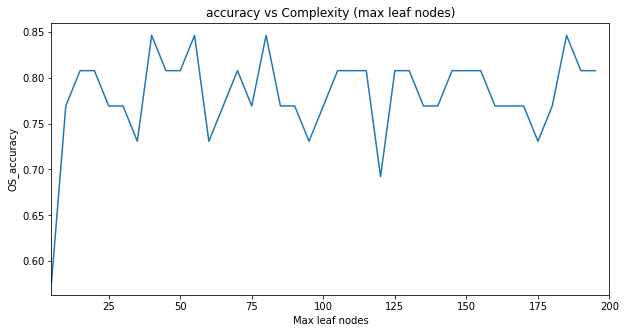

In [9]:
# your code here
plt.figure(figsize=(10,5))
plt.plot(range(5,200,5),OS_accuracy)
plt.xlabel("Max leaf nodes")
plt.ylabel("OS_accuracy")
plt.title("accuracy vs Complexity (max leaf nodes)")
plt.xlim(5,200)
plt.show()

c) Tune the hyper-parameter by cross-validation using the training data. 

In [10]:
X_crosstrain, X_vail, Y_crosstrain,Y_vail = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_leaf_nodes':range(5,200,5)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='accuracy')
rs=gr.fit(X_crosstrain,Y_crosstrain)
print(rs.best_params_)

{'max_leaf_nodes': 95}


In [15]:
print(accuracy_score(Y_vail,rs.predict(X_vail)))

0.5238095238095238


Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data

In [16]:
# your code here 
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=2) # just to keep it simple for visualization
dt.fit(X_train,Y_train)

# display the output using www.webgraphviz.com, or if you have GraphViz installed on
# your computer, you can use that
print(tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=["low", "medium", "high","awful"],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\","))

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="GDPPCptaIntDol <= 2978.5, samples = 104, value = [27, 26, 25, 26], class = low", fillcolor="#fffdfc"] ;
1 [label="SustAccImprWatUrb <= 0.842, samples = 48, value = [26, 20, 0, 2], class = low", fillcolor="#f9e4d5"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 22, value = [19, 3, 0, 0], class = low", fillcolor="#e99558"] ;
1 -> 2 ;
3 [label="samples = 26, value = [7, 17, 0, 2], class = medium", fillcolor="#9ef197"] ;
1 -> 3 ;
4 [label="SustAccImprSanRur <= 0.644, samples = 56, value = [1, 6, 25, 24], class = high", fillcolor="#f9fcfe"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="samples = 32, value = [1, 6, 5, 20], class = awful", fillcolor="#e994f1"] ;
4 -> 5 ;
6 [label="samples = 24, value = [0, 0, 20, 4], class = high", fillcolor="#61b1ea"] ;
4 -> 6 ;
}


In [17]:
# your code here
from sklearn.ensemble import RandomForestClassifier
param_grid = {'max_depth':range(1,20)}
model=RandomForestClassifier(n_jobs=-1)
GR=GridSearchCV(model,param_grid=param_grid,scoring='accuracy')
RS=GR.fit(X_train,Y_train)
print(RS.best_params_)
print(accuracy_score(Y_test,RS.predict(X_test)))

{'max_depth': 15}
0.7692307692307693


###  Fit a random forest to the data

In [18]:
data={'Y':Y_test,'Predict':RS.predict(X_test)}
result=pd.DataFrame(data)
result

,Y,Predict
8,high,high
59,medium,medium
92,high,high
104,low,low
97,low,low
30,high,awful
44,awful,awful
33,low,low
63,medium,medium
26,low,low


From the accuracy results of the above two models, we can see that the random forest model is more accurate than the decision tree model.
However, the internal structure of the random forest model is more complex than that of the decision tree, and the decision tree model 
has a stronger interpretability.